In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import minimize

# get rid of zero frequency so we dont divide by zero

In [3]:
pxx = np.load('pxx.npy')[1:]

In [4]:
fr = np.load('fr.npy')[1:]

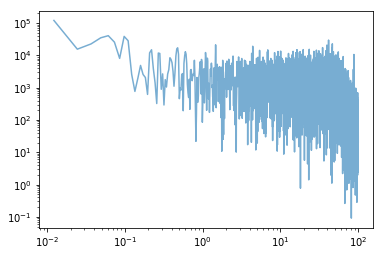

In [5]:
loglog(fr, pxx, alpha = 0.6)

In [6]:
def noise_model_with_alpha(f, white_noise, f_knee, alpha, f_c, amp):
    return ((white_noise)*(1 + (f_knee/f)**alpha)* (1/(1 + (f/f_c)**2))+amp)

In [15]:
def resids(x):
    white_noise, f_knee, alpha, f_c, amp = x
    prior = priors(x)
    if np.isfinite(prior):
        return np.sum( (noise_model_with_alpha(fr, white_noise, f_knee, alpha, f_c, amp) - pxx)**2 )
    else:
        return prior

In [16]:
def priors(x):
    white_noise, f_knee, alpha, f_c, amp = x
    if white_noise < 0 or f_knee < 0 or alpha < 0 or f_c < 0 or amp <0:
        return np.inf
    else:
        return 0

In [89]:
p0 = np.array([3000, 0.2, 1.5, 0.2, 100])

In [90]:
popt1 = minimize(resids, p0)

In [91]:
popt2 = minimize(resids, p0, bounds=((None, None), (0, None), (0, None), (0, None), (None, None)) )

In [94]:
popt3 = minimize(resids, p0, method='Powell')

In [95]:
print(popt1.x)
print(popt2.x)
print(popt3.x)

[2.83775503e+03 6.68859475e-02 2.21983061e+00 4.73365174e+01
 8.75049270e+00]
[2.96506097e+03 1.74554305e-01 1.37357803e+00 4.17485911e+01
 4.33862863e+01]
[2.71101097e+03 2.15479555e-01 1.29152079e+00 4.64461487e+01
 1.03489151e-04]


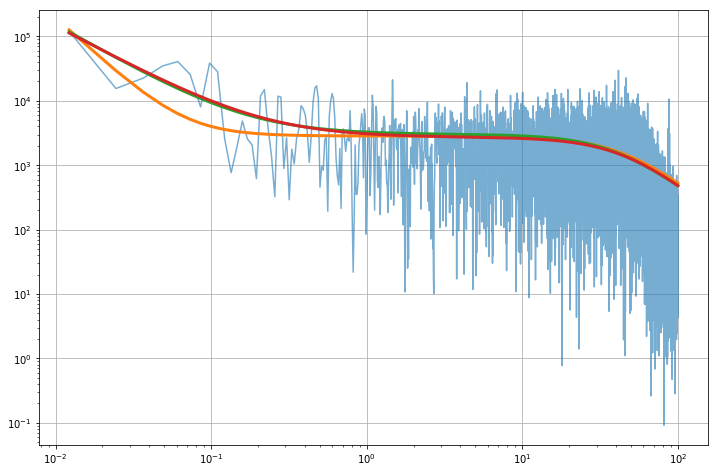

In [96]:
figsize(12, 8)
loglog(fr, pxx, alpha = 0.6)
loglog(fr, noise_model_with_alpha(fr, *popt1.x), lw=3)
loglog(fr, noise_model_with_alpha(fr, *popt2.x), lw=3)
loglog(fr, noise_model_with_alpha(fr, *popt3.x), lw=3)
grid(ls='-')